# <center>Итоговый проект</center>

Загрузим необходимые нам библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
import plotly.express as px

Начнём работу с первым датасетом. Выведем сам датасет, чтобы познакомитсья с ним.

In [3]:
data_1 = pd.read_csv('data/dataset_1.csv')
display(data_1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

**<u>Признаки в данных:</u>**

* **Pregnancies** — количество беременностей.
* **Glucose** — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
* **BloodPressure** — диастолическое артериальное давление (мм рт. ст.).
* **SkinThickness** — толщина кожной складки трицепса (мм).
* **Insulin** — двухчасовой сывороточный инсулин (ме Ед/мл).
* **BMI** — индекс массы тела
* **DiabetesPedigreeFunction** — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
* **Age** — возраст.
* **Outcome** — наличие диабета (0 — нет, 1 — да).

Выведем основную информацию о датасете, которая может нам понадобиться, с помощью метода `info()` и `describe()` и  корреляцию признаков с помощью метода `corr()`, для вычисления парной корреляции столбцов.

In [4]:
data_1.info()
data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


В датасете нет пустых значений, но по таким признакам как *'Glucose'*, *'BloodPressure'*, *'SkinThickness'*, *'Insulin'*, *'BMI'* максимальные и минимальные значения явно недостоверные. Минимальные значения по данным признакам не может быть равно 0, скорее всего эти данным не были заполнены изначально, а были пропуски, которые приравняли к нулям. По максимальным значениям тоже остаётся вопрос, скорее всего это выбросы. 

In [5]:
data_1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Корреляцию используют, чтобы оценить зависимость переменных друг от друга. Если два показателя коррелируют друг с другом, выше вероятность, что они как-то связаны.

Корреляция может быть:
* **положительной** — когда один показатель растет, другой тоже растет;
* **отрицательной** — когда одна переменная растет, другая уменьшается;
* **нейтральной** — изменения не связаны друг с другом.

Попробуем сделать эту таблицу более наглядной используя `heatmap`.

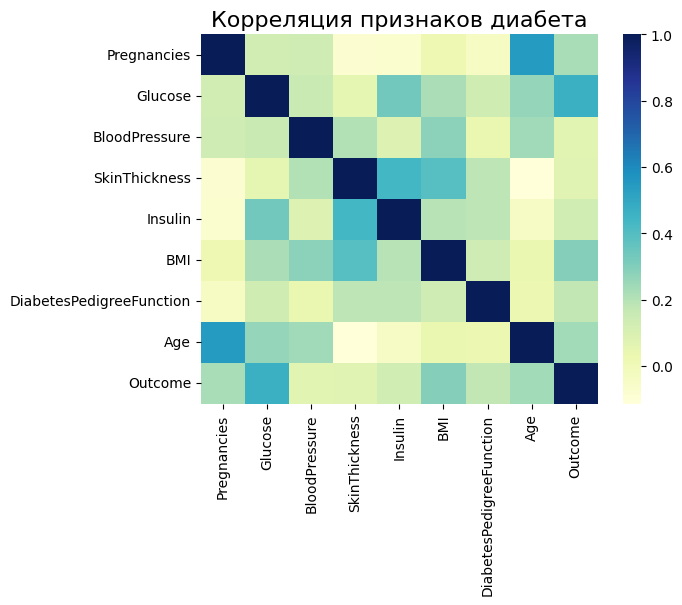

In [6]:
heatmap = sns.heatmap(data=data_1.corr(), cmap='YlGnBu')
heatmap.set_title('Корреляция признаков диабета', fontsize=16);

У интересующего нас признака *'Outcome'* явная положительная корреляция с признаком *'Glucose'* (0.47), что и логично, ведь при нарушении толерантности к глюкозе развивается сахарный диабет II типа. Также можно заметить не такую явную корреляцию с признаком *'BMI'* (0.29), что, впринципе, тоже логично, т.к. для людей с сахарным диабетом II типа характерно наличие избыточного веса. Ещё меньше корреляция у признаков *'Pregnancies'* и *'Age'*. На данной корреляции можно не делать акцент, но можно сделать предпололжение, что, как правило, у пожилых людей в анамнезе больше заболеваний, чем у молодых, следовательно у пожилых пациентов анамнез заболеваний больше. А касательно беременностей: что для женского организма беременность и роды - особенные состояния, во время которых происходят изменения в организме, помимо гормальных, во время которых могут проявиться заболевания, к которым генетически предраспололжена женщина и которых ранее у неё не было. Следовательно каждая последующая беременность и роды, потенциально могут спровоцировать развитие диабета, к которому может быть предрасположена женщина.

Помимо этого проанализируем, на примере коробчатых диаграмм, признаки для групп 'с диабетом' и 'без'. Для этого:
1) Предварительно напишем функцию, которая будет строить коробчатые диаграммы по признакам для групп 'с диабетом' и 'без'. 
2) Создадим фигуру с восьмью ячейками, в которых и визуализируем наши диаграммы. 
3) Запустим нашу функцию внутри цикла, который будет заносить наши коробчатые диаграммы в соответствующую ячейку.
4) А для признаков кроме `exceptions`, куда мы занесём исключения, отсечём нулевые значения (явные выбросы), для лучшей визуализации.

In [7]:
# Прописываем функцию:
def box_plot(ax: Axes, diabet: pd.Series, not_diabet: pd.Series, title: str) -> None:
    """
    Функция для создания коробчатых диаграм по признакам для групп 'с диабетом' и 'без диабета'.
    
    Args:
        axes (Axes): ось
        diabet (pd.Series): значение признака 'при диабете'
        not_diabet (pd.Series): значение признака 'без диабета'
        title (str): название диаграммы
    """
    ax.boxplot(
        [diabet, not_diabet],
        vert=False
    )
    ax.set_title(title)
    ax.set_yticklabels(labels=['диабет', 'нет диабета'])
    ax.tick_params(axis='y', labelrotation=70)

In [8]:
print(box_plot.__annotations__)

{'ax': <class 'matplotlib.axes._axes.Axes'>, 'diabet': <class 'pandas.core.series.Series'>, 'not_diabet': <class 'pandas.core.series.Series'>, 'title': <class 'str'>, 'return': None}


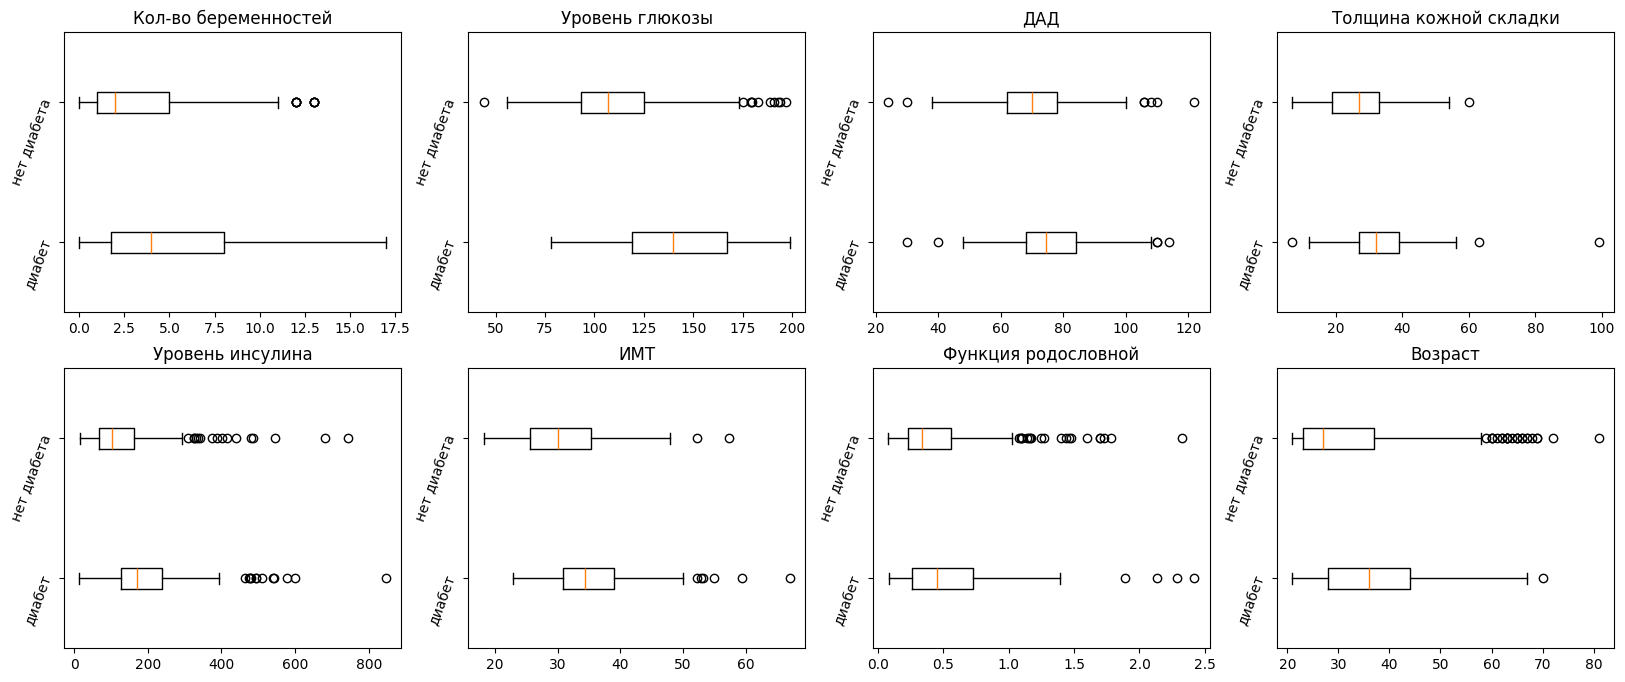

In [9]:
# Наш 'холст':
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

# Создадим список с названиями наших диаграмм:
titles = ['Кол-во беременностей', 'Уровень глюкозы', 'ДАД', 'Толщина кожной складки', 'Уровень инсулина', 'ИМТ', 'Функция родословной', 'Возраст']
# Список с признаками-исключениями, в которых допускаем значение = 0:
exceptions = {'Pregnancies', 'DiabetesPedigreeFunction'}

# Наш цикл:
for i, (column, title) in enumerate(zip(data_1.columns, titles)):
    data_1_copy = data_1
    # Во всех признаках, кроме исключений, отсекаем нулевые значения:
    if column not in exceptions:
        data_1_copy = data_1_copy[data_1_copy[column] != 0]
    # Создаём переменные, в которых будет рассчитываться индекс нашей диаграммы:
    row = i // 4
    col = i % 4
    # Переменные для групп по признаку: 
    diabet = data_1_copy[data_1_copy['Outcome'] == 1][column]
    not_diabet = data_1_copy[data_1_copy['Outcome'] == 0][column]
    
    # Заносим результат в нашу функцию:
    box_plot(axes[row][col], diabet, not_diabet, title)

Благодаря этим диаграммам мы видим, что для признаков, где медиана одной группы, выходит за межквартильный диапазон второй группы - разница статистически значима. К таким признакам относятся: 
* Уровень глюкозы (*'Glucose'*), 
* Толщина кожной складки (*'SkinThickness'*), 
* Уровень инсулина (*'Insulin'*), 
* ИМТ (*'BMI'*), 
* Возраст (*'Age'*).

Повторим наше знакомство, но со вторым датасетом.

In [10]:
data_2 = pd.read_csv('data/dataset_2.csv')
display(data_2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0
844,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0
845,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN
846,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0


Набор данных, связанный с исследованием сердечно-сосудистой системы у жителей города Фрамингем, штат Массачусетс.

**<u>Признаки в данных:</u>**

<u>Демографические</u>

* **age** - возраст пациента;
* **sex** - мужской или женский ("M" or "F");
* **is_smoking** - является ли пациент курильщиком в настоящее время ("YES" or "NO");
* **cigsPerDay** - количество сигарет, которые человек выкуривает в среднем за один день.

<u>Медицинские</u>

* **BPMeds** - принимал ли пациент лекарства от артериального давления;
* **prevalentStroke** - был ли у пациента ранее инсульт;
* **prevalentHyp** - была ли или нет у пациента гипертония;
* **diabetes** - был ли у пациента диабет;
* **totChol** - уровень общего холестерина;
* **sysBP** - систолическое артериальное давление;
* **diaBP** - диастолическое артериальное давление;
* **BMI** - индекс массы тела;
* **heartRate** - частота сердечных сокращений;
* **glucose** - уровень глюкозы.

Для признаков записанных в двоичной системе: 0 — нет, 1 — да.

P.S.
В справочной информации к данному датасету не сказаны, условия определения гликемии, натощак или после перорального теста с глюкозой. Скорее всего натощак, т.к. датасет посвящён не диабету, а ИБС и скорее всего показатели анализов взяты из стандартного биохимического анализа крови.

P.P.S.
После 2 часового перорального теста уровень гликемии падает до исходного (в случае нормы). Поэтому на группе "без диабета" это не отразится, а вот в группе "с диабетом" этот признак может измениться.

In [11]:
data_2.info()
data_2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,848.000000,848.000000,830.000000,841.000000,839.000000,848.000000,848.000000,848.000000,836.000000,848.000000,848.000000,843.000000,848.000000,764.000000
mean,3813.500000,49.755896,2.010843,8.737218,0.028605,0.003538,0.291274,0.025943,235.307416,131.357901,82.935142,25.830214,75.485849,81.482984
std,244.940809,8.491712,1.022605,12.086441,0.166794,0.059409,0.454617,0.159060,41.848200,20.975519,11.455908,3.937668,12.242137,22.782486
min,3390.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.000000,92.000000,55.000000,15.540000,44.000000,40.000000
25%,3601.750000,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,75.000000,23.285000,67.000000,72.000000
50%,3813.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,82.000000,25.500000,75.000000,77.000000
75%,4025.250000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,260.000000,142.500000,89.000000,28.075000,82.000000,87.000000
max,4237.000000,69.000000,4.000000,60.000000,1.000000,1.000000,1.000000,1.000000,405.000000,206.000000,140.000000,43.300000,130.000000,370.000000


Во втором датасете есть столбцы с пропусками: `['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']`.

Также есть схожие признаки. Для `data_1` это `['Age', 'Outcome', 'BloodPressure', 'BMI', 'Glucose']`, которые соответствуют `['age', 'diabetes', 'diaBP', 'BMI', 'glucose']` из `data_2`. 

Помимо этого признаки `['BloodPressure', 'Glucose']` из `data_1` запсиана в формате *int64*, а соответствующие им `['diaBP', 'glucose']` из `data_2` в формате *float64*.

Произведём некоторые изменения с нашими датасетами. Для каждого создадим копию, в которых и будем осуществлять изменения.

Для `data_1_copy`:
1) Добавим признак `'Sex'`, который для всех равен `F`;
2) Переименуем признаки `'Outcome'` в `'Diabetes'` и `'BloodPressure'` в `'DiaBP'`.

Для `data_2_copy`:
1) Удалим не несущие для нас информацию признаки `['id', 'education']`;
2) Удалим строки, в которых есть NaN, т.к. для медицинской статистики заменять эти значения средним/модой неправильно, получим недостоверные данные;
3) Переименуем столбцы, чтобы стилистика написания совпадала с первым датасетом.

In [12]:
data_1_copy = data_1.copy()
data_1_copy['Sex'] = 'F'
data_1_copy.rename(columns={
    'Outcome': 'Diabetes',
    'BloodPressure': 'DiaBP'
    },
    inplace=True
)

In [13]:
data_2_copy = data_2.copy()
data_2_copy = data_2_copy.drop(['id', 'education'], axis=1, inplace=False)
data_2_copy = data_2_copy.dropna()
data_2_copy.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'is_smoking': 'Smoker',
    'cigsPerDay': 'CigsPerDay',
    'prevalentStroke': 'PrevalentStroke',
    'prevalentHyp': 'PrevalentHyp',
    'diabetes': 'Diabetes',
    'totChol': 'TotChol',
    'sysBP': 'SysBP',
    'diaBP': 'DiaBP',
    'heartRate': 'HeartRate',
    'glucose': 'Glucose',
    },
    inplace=True
)

Объединим два датасета, чтобы увеличить выборку. Уменьшим количество признаков в пользу увеличения количества объектов в выборке. 

"Как правило, больший размер выборки - лучше, большего признакового пространства. Увеличение размера выборки за счет объединения датасетов может помочь в обучении более точных моделей, особенно если исходный размер выборки небольшой. При этом отказ от части признаков может быть оправданным, если эти признаки либо не несут существенной информации для решаемой задачи, либо их наличие может внести 'шум' или излишнюю сложность в модель." - Александра Голованова (Ментор).

В данной задаче нет иного выхода, кроме как отказаться от части признаков, так как мы не можем "восстановить" значения для недостающих признаков. Объединять будем по признакам `['Age', 'Sex', 'Diabetes', 'DiaBP', 'BMI', 'Glucose']`.

In [14]:
# Соединяем датасеты:
concat_data = pd.concat([data_1_copy, data_2_copy], ignore_index=True)
concat_data

,Pregnancies,Glucose,DiaBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,Sex,Smoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,TotChol,SysBP,HeartRate
0,6.0,148.0,72.0,35.0,0.0,33.60,0.627,50,1,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.60,0.351,31,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32,1,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.10,2.288,33,1,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,NaN,83.0,91.0,NaN,NaN,24.30,NaN,49,0,F,YES,4.0,0.0,0.0,1.0,227.0,150.0,88.0
1509,NaN,77.0,77.5,NaN,NaN,27.42,NaN,46,0,F,NO,0.0,0.0,0.0,0.0,277.0,122.5,63.0
1510,NaN,70.0,67.0,NaN,NaN,23.08,NaN,58,0,F,NO,0.0,0.0,0.0,0.0,190.0,132.0,65.0
1511,NaN,92.0,104.5,NaN,NaN,22.86,NaN,45,0,F,NO,0.0,0.0,0.0,1.0,231.0,157.5,75.0


In [15]:
# Оставляем интересующие нас признаки:
concat_data = concat_data[["Sex", "Age", "Diabetes", "Glucose", "BMI", "DiaBP"]]

# Изменим значения в стобце "Sex" на двоичные:
mask_1 = concat_data['Sex'] == 'F'
concat_data.loc[mask_1, 'Sex'] = 0

mask_2 = concat_data['Sex'] == 'M'
concat_data.loc[mask_2, 'Sex'] = 1

concat_data

,Sex,Age,Diabetes,Glucose,BMI,DiaBP
0,0,50,1,148.0,33.60,72.0
1,0,31,0,85.0,26.60,66.0
2,0,32,1,183.0,23.30,64.0
3,0,21,0,89.0,28.10,66.0
4,0,33,1,137.0,43.10,40.0
...,...,...,...,...,...,...
1508,0,49,0,83.0,24.30,91.0
1509,0,46,0,77.0,27.42,77.5
1510,0,58,0,70.0,23.08,67.0
1511,0,45,0,92.0,22.86,104.5


In [16]:
# Повторим наш анализ с получившимся датасетом:
concat_data.corr()

,Sex,Age,Diabetes,Glucose,BMI,DiaBP
Sex,1.000000,0.339875,-0.206870,-0.280370,-0.215683,0.228272
Age,0.339875,1.000000,-0.114002,-0.218229,-0.241371,0.394401
Diabetes,-0.206870,-0.114002,1.000000,0.588401,0.396980,-0.116225
Glucose,-0.280370,-0.218229,0.588401,1.000000,0.387509,-0.146627
BMI,-0.215683,-0.241371,0.396980,0.387509,1.000000,0.066187
DiaBP,0.228272,0.394401,-0.116225,-0.146627,0.066187,1.000000


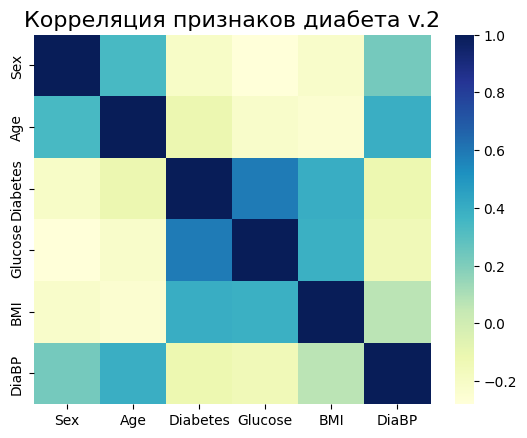

In [17]:
heatmap = sns.heatmap(data=concat_data.corr(), cmap='YlGnBu')
heatmap.set_title('Корреляция признаков диабета v.2', fontsize=16);

С увеличением выборки наши выводы по первому датасету подтвердились и даже стали куда очевиднее. У интересующего нас признака *'Diabetes'* (он же *'Outcome'* в `data_1`) ещё более явная положительная корреляция с признаком *'Glucose'* (0.59), также увеличилась корреляция с признаком *'BMI'* (0.40).

Знакомимся с третьим датасетом.

In [18]:
data_3 = pd.read_csv('data/dataset_3.csv')
display(data_3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Набор данных, содержащий 253 680 ответов на опрос.

**<u>Признаки в данных:</u>**
* **Diabetes_012** - 0 = нет диабета, 1 = преддиабет, 2 = диабет;
* **HighBP** - 0 = нет высокого АД, 1 = высокое АД;
* **HighChol** - 0 = нет высокого уровня холестерина, 1 = высокий уровень холестерина;
* **CholCheck** - 0 = нет проверки уровня холестерина в течение 5 лет, 1 = есть проверка уровня холестерина в течение 5 лет;
* **BMI** - индекс массы тела;
* **Smoker** - выкурено свыше 100 сигарет [5 пачек = 100 сигарет]: 0 = нет, 1 = да;
* **Stroke** - инсульт в анамнезе: 0 = нет, 1 = да;
* **HeartDiseaseorAttack** - ИБС или ИМ в анамнезе: 0 = нет, 1 = да;
* **PhysActivity** - физическая активность за последние 30 дней, не включая работу: 0 = нет, 1 = да;
* **Fruits** - употребление фруктов 1 или более раз в день: 0 = нет, 1 = да;
* **Veggies** - употребление овощей 1 или более раз в день: 0 = нет, 1 = да;
* **HvyAlcoholConsump** - злоупотребление алкоголем (взрослые мужчины, выпивающие более 14 порций алкоголя в неделю, и взрослые женщиныб выпивающие более 7 порций алкоголя в неделю): 0 = нет, 1 = да;
* **AnyHealthcare** - наличие какой-либо медицинской страховки: 0 = нет, 1 = да;
* **NoDocbcCost** - наличие в анамнезе ситуации за последние 12 месяцев, когда нужно было обратиться к врачу, но не было возможности из-за стоимости: 0 = нет, 1 = да;
* **GenHlth** - оценка собственного здоровья по шкале от 1 до 5: 1 = отличное, 2 = очень хорошее, 3 = хорошее, 4 = удовлетворительное, 5 = плохое;
* **MentHlth** - оценка собственного психического здоровья, кол-во дней за последние 30 с наличием тем или иным психологическим заболеванием;
* **PhysHlth** - оценка собственного физического здоровья, кол-во дней за последние 30 с наличием той или иной травмой, физическим заболеванием;
* **DiffWalk** - трудности при ходьбе или подъеме по лестнице: 0 = нет, 1 = да;
* **Sex** - 0 = женщина, 1 = мужчина;
* **Age** - 13-уровневая возрастная категория: 1 = 18–24, 9 = 60–64, 13 = 80 и старше;
* **Education** - уровень образования по шкале от 1 до 6: 1 = никогда не посещал школу или только детский сад, 2 = с 1 по 8 классы;
* **Income** - шкала дохода 1–8: 1 = менее 10 000 долларов США, 5 = менее 35 000 долларов США, 8 = 75 000 долларов США или более.

In [19]:
data_3.info()
data_3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Пустых значений в `data_3` нет. 

Проанализировав третий датасет получаем 6 признаков, по которым мы могли бы увеличить нашу выборку. Из них у трёх признаков (`"BMI"`, `"Sex"`, `"Age"`) идентичная система записи и ещё у трех есть различия:
* `"Diabetes_012"`: содержит дополнительный параметр оценки "преддиабет", в отличие от нашего объединенного датасета;
* `"HighBP"`: данный признак двоичный, а не числовой, как в нашем датасете;
* `"Age"`: записан в 13-уровневой системе оценки возраста.

В связи с чем придётся выполнить ряд преобразований в `concat_data`:
1) На основании уровня глюкозы в `"Glucose"` изменим значения на *0* - нет диабета, *1* - преддиабет, *2* - диабет`;
2) На основании цифр `"DiaBP"` изменим содержимое на *0* - нет высокого АД, *1* - высокое АД;
3) Создадим функцию, которая будет изменять возраст в столбце `"Age"` в соответствии с 13-уровневой системой.

Т.к. в `data_1` уровень гликемии был взял после перерорального теста с глюкозой, то для этой группы пациентов (первые 768 строк) условия:
* меньше 7.8 - *норма*;
* 7.8-11.0 - *преддиабет*;
* больше 11.0 - *диабет*.

В `data_2` мы предположили, что уровень гликемии был определён натощак, т.к. обратное нигде не сказано. Для них:
* меньше 5.6 - *норма*;
* 5.6-6.0 - *преддиабет*;
* больше 6.0 - *диабет*.

P.S.

В США уровень глюкозы измеряется и указывается в миллиграммах на децилитр крови (mg/dl). В России и Европе — в микромолях на литр (ммоль/л). Для перехода из одной системы в другую необходимо взять коэффициент равный примерно 18: русский показатель умножить на 18, американский — разделить на 18.

Или воспользоваться готовой таблицей (смотри ниже).

![image.png](https://i2.wp.com/moussyusa.com/wp-content/uploads/2018/11/blood-sugar-chart-06.jpg)

In [20]:
# Функция для первой половины concat_data, которую мы получили из data_1:
def is_diabetes(glucose: float) -> int:
    """Функция для преобразования значения гликемии в признаке "Glucose" на диагноз
    где:
    0 - нет диабета
    1 - преддиабет
    2 - диабет

    Args:
        glucose (float): значение гликемии в столбце "Glucose"

    Returns:
        int: соответсвующий диагноз
    """
    
    if glucose < 140:
            return 0
    elif 140 <= glucose <= 197:
            return 1
    elif glucose > 197:
            return 2


In [21]:
# Функция для второй половины concat_data, которую мы получили из data_2:
def is_diabetes_v2(glucose: float) -> int:
    """Функция для преобразования значения гликемии в признаке "Glucose" на диагноз
    где:
    0 - нет диабета
    1 - преддиабет
    2 - диабет

    Args:
        glucose (float): значение гликемии в столбце "Glucose"

    Returns:
        int: соответсвующий диагноз
    """
    
    if glucose < 101:
            return 0
    elif 101 <= glucose <= 108:
            return 1
    elif glucose > 108:
            return 2 

In [22]:
# Поделим наш concat_data, чтобы применить к каждой половине соответствующую функцию:
first_part = concat_data.iloc[:768].copy()
second_part = concat_data.iloc[768:].copy()

# Применяем функции:
first_part["IsDiabetes"] = first_part["Glucose"].apply(is_diabetes)
second_part["IsDiabetes"] = second_part["Glucose"].apply(is_diabetes_v2)

# Заново соединяем наши половинки:
concat_df = pd.concat([first_part, second_part])

# Теперь можно убрать не нужные нам столбцы:
concat_df = concat_df.drop(['Diabetes', 'Glucose'], axis=1, inplace=False)
concat_df

,Sex,Age,BMI,DiaBP,IsDiabetes
0,0,50,33.60,72.0,1
1,0,31,26.60,66.0,0
2,0,32,23.30,64.0,1
3,0,21,28.10,66.0,0
4,0,33,43.10,40.0,0
...,...,...,...,...,...
1508,0,49,24.30,91.0,0
1509,0,46,27.42,77.5,0
1510,0,58,23.08,67.0,0
1511,0,45,22.86,104.5,0


Перейдём ко второму пункту. Работа с признаком `'DiaBP'`. Согласно классификации артериальной гипертензии:
* *ДАД < 90* - нормальное (объединим категории "оптимальное", "нормальное" и "высокое нормальное"), будет = 0;
* *ДАД >= 90* - высокое (сюда относятся разные степени гипертензии), будет = 1.


In [23]:
# Применим лямбда-функцию к столбцу с ДАД и изменим название столбца:
concat_df['DiaBP'] = concat_df['DiaBP'].apply(lambda x: 1 if x >= 90 else 0)
concat_df.rename(columns={'DiaBP': 'HighBP'}, inplace=True)
concat_df

,Sex,Age,BMI,HighBP,IsDiabetes
0,0,50,33.60,0,1
1,0,31,26.60,0,0
2,0,32,23.30,0,1
3,0,21,28.10,0,0
4,0,33,43.10,0,0
...,...,...,...,...,...
1508,0,49,24.30,1,0
1509,0,46,27.42,0,0
1510,0,58,23.08,0,0
1511,0,45,22.86,1,0


Ну и третий пункт.

In [24]:
def age_level(age: int) -> int:
    """Функция для перевода возраста в соответствующий уровень 13-уровневой сис-мы.

    Args:
        age (int): возраст

    Returns:
        int: уровень/категория
    """
    if age < 18:
        return 0
    elif 18<= age <=24:
        return 1
    elif 25<= age <=29:
        return 2
    elif 30<= age <=34:
        return 3
    elif 35<= age <=39:
        return 4
    elif 40<= age <=44:
        return 5
    elif 45<= age <=49:
        return 6
    elif 50<= age <=54:
        return 7
    elif 55<= age <=59:
        return 8
    elif 60<= age <=64:
        return 9
    elif 65<= age <=69:
        return 10
    elif 70<= age <=74:
        return 11
    elif 75<= age <=79:
        return 12
    elif age > 80:
        return 13

In [25]:
concat_df['Age'] = concat_df['Age'].apply(age_level)
concat_df

,Sex,Age,BMI,HighBP,IsDiabetes
0,0,7,33.60,0,1
1,0,3,26.60,0,0
2,0,3,23.30,0,1
3,0,1,28.10,0,0
4,0,3,43.10,0,0
...,...,...,...,...,...
1508,0,6,24.30,1,0
1509,0,6,27.42,0,0
1510,0,8,23.08,0,0
1511,0,6,22.86,1,0


In [26]:
# Небольшие изменения в data_3, чтобы было проще его присоединять:
data_3_copy = data_3.copy()
data_3_copy.rename(columns={'Diabetes_012': 'IsDiabetes'}, inplace=True)
data_3_copy = data_3_copy[["Sex", "Age", "BMI", "HighBP", "IsDiabetes"]]
data_3_copy

,Sex,Age,BMI,HighBP,IsDiabetes
0,0.0,9.0,40.0,1.0,0.0
1,0.0,7.0,25.0,0.0,0.0
2,0.0,9.0,28.0,1.0,0.0
3,0.0,11.0,27.0,1.0,0.0
4,0.0,11.0,24.0,1.0,0.0
...,...,...,...,...,...
253675,1.0,5.0,45.0,1.0,0.0
253676,0.0,11.0,18.0,1.0,2.0
253677,0.0,2.0,28.0,0.0,0.0
253678,1.0,7.0,23.0,1.0,0.0


In [27]:
# Соединяем датасеты:
final_data = pd.concat([concat_df, data_3_copy], ignore_index=True)
final_data

,Sex,Age,BMI,HighBP,IsDiabetes
0,0,7.0,33.6,0.0,1.0
1,0,3.0,26.6,0.0,0.0
2,0,3.0,23.3,0.0,1.0
3,0,1.0,28.1,0.0,0.0
4,0,3.0,43.1,0.0,0.0
...,...,...,...,...,...
255188,1.0,5.0,45.0,1.0,0.0
255189,0.0,11.0,18.0,1.0,2.0
255190,0.0,2.0,28.0,0.0,0.0
255191,1.0,7.0,23.0,1.0,0.0


In [28]:
# Повторим наш анализ с получившимся датасетом:
final_data.corr()

,Sex,Age,BMI,HighBP,IsDiabetes
Sex,1.000000,-0.022923,0.041365,0.053895,0.031077
Age,-0.022923,1.000000,-0.038099,0.345965,0.184914
BMI,0.041365,-0.038099,1.000000,0.212456,0.224173
HighBP,0.053895,0.345965,0.212456,1.000000,0.271154
IsDiabetes,0.031077,0.184914,0.224173,0.271154,1.000000


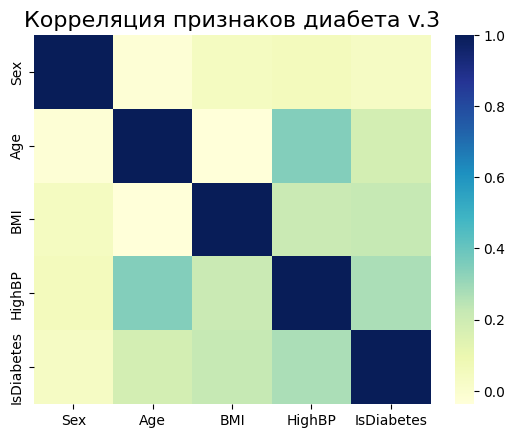

In [29]:
heatmap = sns.heatmap(data=final_data.corr(), cmap='YlGnBu')
heatmap.set_title('Корреляция признаков диабета v.3', fontsize=16);

К сожалению, учитывая, что признаков у нас осталось не так много для корреляции, выглядит это не так наглядно, как при прошлом объединении. Но всё равно заметно, что наибольшая положительная корреляция с признаком `"HighBP"`, что логично. Известно, что при диабете сосуды претерпевают изменения и развиваются микроангиопатии (к которым относятся нейро-, нефро-, ретинопатии) и макроангиопатии (ИБС, инсульт, атеросклероз). Предиктором таких изменений может выступать в том числе и артериальная гипертензия.

Проанализируем получившийся датасет.

In [30]:
fig = px.treemap(
    data_frame=final_data,
    path=['IsDiabetes'],
    title='Итоговая выборка'
)

fig.show()

В нашем датасете получился очень большой процент людей без диабета (около 84%). Возможно это связано с тем, что в `data_2` и `data_3` маленький процент людей с диабетом, но мы не проанализировали это заранее.

# <center>Выводы:</center>

Основная причина развития диабета это **высокий уровень гликемии**, в чём мы убедились проанализировав первые два датасета. Вместе с этим отмечается, что у людей с диабетом ИМТ (он же *BMI*) выше, чем у людей без диабета.